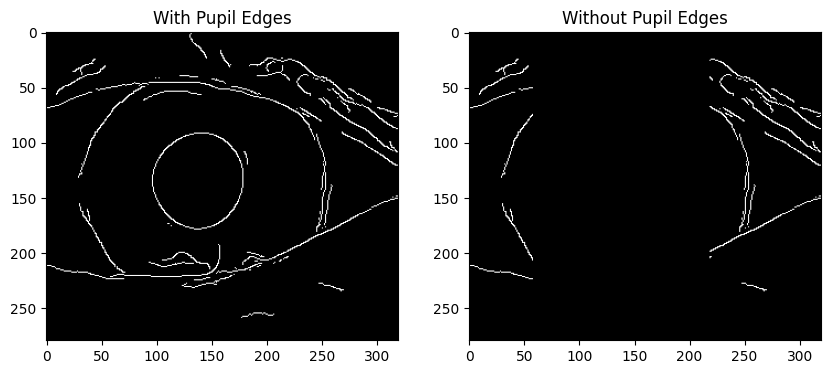

In [1]:
# Step 8: Removing the edges of the pupil from the edge-detected image

import numpy as np
import cv2
from skimage.transform import hough_circle, hough_circle_peaks
import matplotlib.pyplot as plt

def IrisLocalization(eye): # input is the eye image in grayscale
    blured = cv2.bilateralFilter(eye, 9, 100, 100) # remove noise
    Xp = blured.sum(axis=0).argmin() # index of the column with the least sum
    Yp = blured.sum(axis=1).argmin() # index of the row with the least sum
    x = blured[max(Yp - 60, 0):min(Yp + 60, 280), max(Xp - 60, 0):min(Xp + 60, 320)].sum(axis=0).argmin()
    y = blured[max(Yp - 60, 0):min(Yp + 60, 280), max(Xp - 60, 0):min(Xp + 60, 320)].sum(axis=1).argmin()
    Xp = max(Xp - 60, 0) + x
    Yp = max(Yp - 60, 0) + y
    if Xp >= 100 and Yp >= 80: # check if the pupil center is not too close to the edge
        blur = cv2.GaussianBlur(eye[Yp - 60:Yp + 60, Xp - 60:Xp + 60], (5, 5), 0)
        pupil_circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, dp=1.2, minDist=200, param1=200, param2=12, minRadius=15, maxRadius=80)
        xp, yp, rp = np.round(pupil_circles[0][0]).astype("int")
        xp = Xp - 60 + xp
        yp = Yp - 60 + yp
    else:
        pupil_circles = cv2.HoughCircles(blured, cv2.HOUGH_GRADIENT, 4, 280, minRadius=25, maxRadius=55, param2=51)
        xp, yp, rp = np.round(pupil_circles[0][0]).astype("int")

    eye_copy = eye.copy()
    rp = rp + 7 # slightly enlarge the pupil radius makes a better result
    blured_copy = cv2.medianBlur(eye_copy, 11)
    blured_copy = cv2.medianBlur(blured_copy, 11)
    blured_copy = cv2.medianBlur(blured_copy, 11)
    eye_edges = cv2.Canny(blured_copy, threshold1=15, threshold2=30, L2gradient=True) # edge detection

    # Display the edge-detected image with pupil edges
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("With Pupil Edges")
    plt.imshow(eye_edges, cmap='gray')

    # Remove the edge of the pupil
    eye_edges[:, xp - rp - 30:xp + rp + 30] = 0

    # Display the edge-detected image without pupil edges
    plt.subplot(1, 2, 2)
    plt.title("Without Pupil Edges")
    plt.imshow(eye_edges, cmap='gray')
    plt.show()

# Example usage
eye = cv2.imread('D:/at school/2024.1/Biometric Authentication System/Project/Biometric/IrisRecognition-master/CASIA Iris Image Database (version 1.0)/006/2/006_2_2.bmp', cv2.IMREAD_GRAYSCALE)
IrisLocalization(eye)